# Abstract

In this notebook, I have performed two algorithms LeNET and AlexNET on a dataset i.e., CIFAR10. Selected Dataset has been trained on these algorithm separately by *using* Keras. Before training dataset, several data exoloration and training has been performed. I have divided this notebook into these portions.

1. Introduction and Summary
*   Overview of LeNET
*   Overview of AlexNET
2. Explaination of Selected Dataset
* WHY CIFAR10 Instead of MNIST and Fashion-MNIST with AlexNET/LeNET
* Comparison of Datasets
* Implementation Issues of Datasets
* Dataset Overview
3. Implementation
* Importing CIFAR-10 dataset
* Exploratory data analysis
* Data Normalization
  
4. LeNet Model Building and Training
* LeNet Explaination
* Training LeNET model
* Results by LeNET
* Confusion Matrix
* Confusion Matrix Plot
* Accuracy score on Test Data set
* Performance Visualization
5. AlexNET Model Building and Training
* AlexNET Explaination
* Training AlexNET model
* Results by AlexNET
* Confusion Matrix
* Confusion Matrix Plot
* Accuracy score on Test Data set
* Performance Visualization
6. Conclusion
7. References

# 1. Introduction and Summary
**1.1. Overview of LeNET**

Lenet was one of the first pre-trained models proposed by Yann LeCun and others [1] (References are availale at the end of this notebook) in the research paper Gradient-Based Learning Applied to Document Recognition in 1998. They used this architecture to recognise handwritten and machine-printed characters. The popularity of this model was primarily due to its simple and straightforward architecture. It is a multi-layer convolution neural network for image classification. Moreover, The network is named LeNET because it has five layers with learnable parameters. It has three sets of convolution layers with an average pooling combination. We have two fully connected layers after the convolution and average pooling layers. Finally, a Softmax classifier classifies the images into their respective classes. Figure 1, provides an overview of LeNET Architecture [2]. 


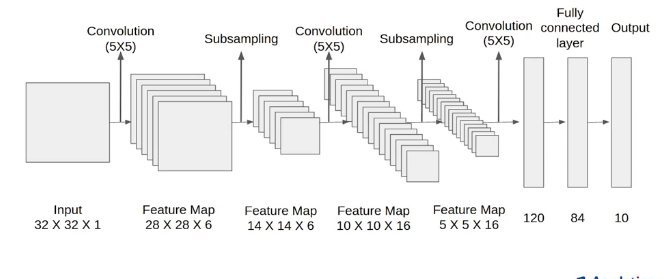



**1.1.1. Key Parameters**

1. Activation Function:


A mathematical operation that transforms the signals of neurons into a scaled output is used to introduce nonlinearities in neural networks. This is referred to as the Activation function. There are various activation functions, but we used the Relu activation function in all layers.

2. ReLu - Activation Function:

(x) = max(0,x)

For the higher +ve values of z, the slope of f(z)=max(0,z) is not close to zero.

3. Softmax - Activation Function
It is defined as.

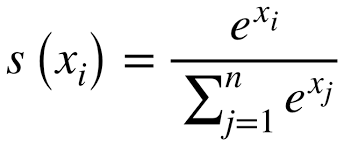

**1.2. Overview of AlexNET**

In 2012, Alexnet won the Imagenet large-scale visual recognition challenge. Alex Krizhevsky and his colleagues proposed the model in their 2012 paper Imagenet Classification with Deep Convolution Neural Network. In comparison to LeNET, the depth of the network was increased in this model.
The Alexnet has eight layers of parameters that can be learned. The model is composed of five layers, the first of which is a max pooling layer, followed by three fully connected layers, and each of these layers, except the output layer, uses Relu activation.
The sigmoid activation or tanh functions were the standard methods for training neural network models. According to AlexNet, deep CNNs could be trained much faster using ReLU nonlinearity than they could using saturating activation functions like tanh or sigmoid. Figure 2, provides the overview of AlexNET Architecture [3].

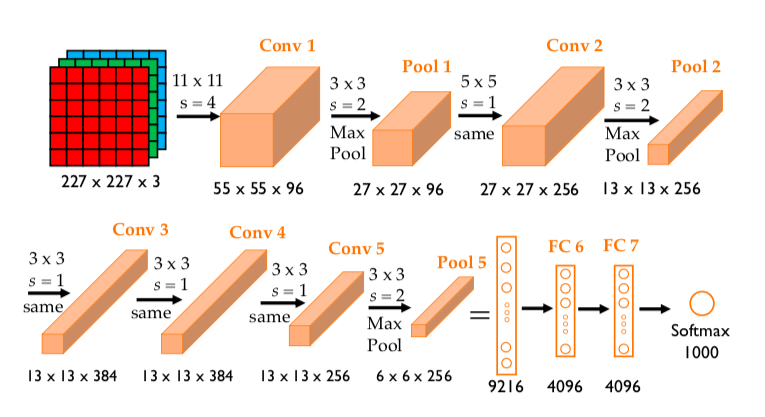

# 2. Explaination of Selected Dataset

**WHY CIFAR10 Instead of MNIST and Fashion-MNIST with AlexNET/LeNET**

As AlexNet has been trained on a very large collection of image nets, LeNet has been trained on the MNIST digits dataset. Since neither of these algorithms know the CIFAR-10, let's train on this data and compare the accuracy.


**Comparison of Datasets** 

Dataset size, pixel details and classes have been compared in the table below.

| Feature      | CIFAR10 | MNIST   | Fashion-MNIST |
|--------------|---------|---------|---------------|
| Dataset Size | 60000   | 70000   | 70000         |
| Pixel Size   | 32 x 32 | 28 x 28 | 28 x 28       |
| classes      | 10      | 10      | 10            |
|              |         |         |               |

Moreover, since the cifar10 is based on color images data of objects, it is clear to understand the performance of the algorithm with respect accuracy. Rest of the datasets are based on grey scale images. I makes it difficult to visually understand the dataset specially in the case of Fashion-MNIST

**Implementation Issues of Datasets** 

 
1. MNIST dataset is based on handwritten digits. It is only effective for the applications where object detection relevent to hands written is required.

2. CIFAR10 has 10000 less example which reduce the size of training examples, but it makes the algorithm computationally cheaper, resulting in fast detection.

3. Fasion-MNIST is based only on greyscall fashion photos.

4. If we compare the what is inside the dataset, it is obvious that CIFAR10 has a very unique data. Which is typically based 10 major classes with 20 subgroups covering almost maximum domains. Which make it a suitable and well opted dataset to work on.

**Dataset Overview**

The CIFAR-10 dataset, which comprises 60,000 colour images of 32x32 pixels with three channels and 6000 images for each class, is divided into 10 separate classes.
The data set is split into training and testing sets. Ten thousand photos are used for testing, and 50,000 are used for training. (https://www.cs.toronto.edu/kriz/cifar.html) is the URL for the CIFAR repository. We'll categorise the photographs using the dataset that's indicated. 

# 3. Implementation

To solve this problem, we will utilise pandas and numpy library. In order to train a model, we must transform photos into a numpy array that will be organised in rows and columns. Matplotlib will be utilised to visualise the photos. We will utilise keras from the Tensorflow backend to load the data. Additionally, we require metrics from Sklearn Liberary such as the classification report and confusion matrix in order to evaluate the model. The libraries we'll be using are imported before we start implementation: The following liberators are the most significant. Numpy is a programme for handling and doing calculations on n-dimensional arrays. The open source platforms utilised for the implementation of neural networks and machine learning models, respectively, are keras and tensorflow.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras import layers, models

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

**Importing CIFAR-10 dataset**

In [2]:
(x_train, y_train), (x_test, y_test)  = keras.datasets.cifar10.load_data()

**Exploratory data analysis**


To know if we have balanced dataset or not?

From the following queries we will examine how many training and testing samples in the dataset.

In [3]:
print('Numer of Training Samples:')
print(f'Number of X Traing samples are : {x_train.shape[0]} ')
print(f'Number of Y Traing samples are : {y_train.shape[0]} ')
print('=====================================================')
print('Number of Test Samples: ')
print(f'Number of X test are : {x_test.shape[0]}')
print(f'Number of Y test are : {y_test.shape[0]} ')

Numer of Training Samples:
Number of X Traing samples are : 50000 
Number of Y Traing samples are : 50000 
Number of Test Samples: 
Number of X test are : 10000
Number of Y test are : 10000 


**Image size**

With the following queries we will know the size of images

In [4]:
print(f'Size of Images is : {len(x_train[1])}x{len(x_train[2])}')

Size of Images is : 32x32


As I mentioned in data introduction that image size is 32x32 and there are 3 channels . lets verify the channels with following code as well.

In [5]:
print(f'Number of color channels in training dataset are : {x_train.shape[3]} ')

print('=====================================================')

print(f'Number of color channels in test data sets are : {x_test.shape[3]}')

Number of color channels in training dataset are : 3 
Number of color channels in test data sets are : 3


From data source we know there are 10 classes lets define respectively.



In [6]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


reshaping labeled class from 2D to 1D array so that we can print class label.

In [7]:
y_train = y_train.reshape(-1,)


To show one image by using index number of that image , creating the following function.In which we will take image from input and label from y and at lat we will match index from both X and y.

In [8]:
def plot_samples(X,y,index):
  plt.figure(figsize=(12,2)) #controlled image size 
  plt.imshow(X[index]) #to show image
  plt.xlabel(classes[y[index]])     #checking image class

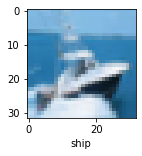

In [9]:
plot_samples(x_train,y_train,8) #function created to see image and class label as well (you can change index to see different image with label)

Let's view more images in a grid format. Defined the dimensions of the plot grid then we uses subplots from matplotlib to plot more than one images in singke frame. after that we flaten the 15 x 15 matrix into 225 array.got the length of the train dataset,Selected a random number from 0 to n_train in for loop,then Selected a random index numbers and for final step read and displayed images with the selected indexes

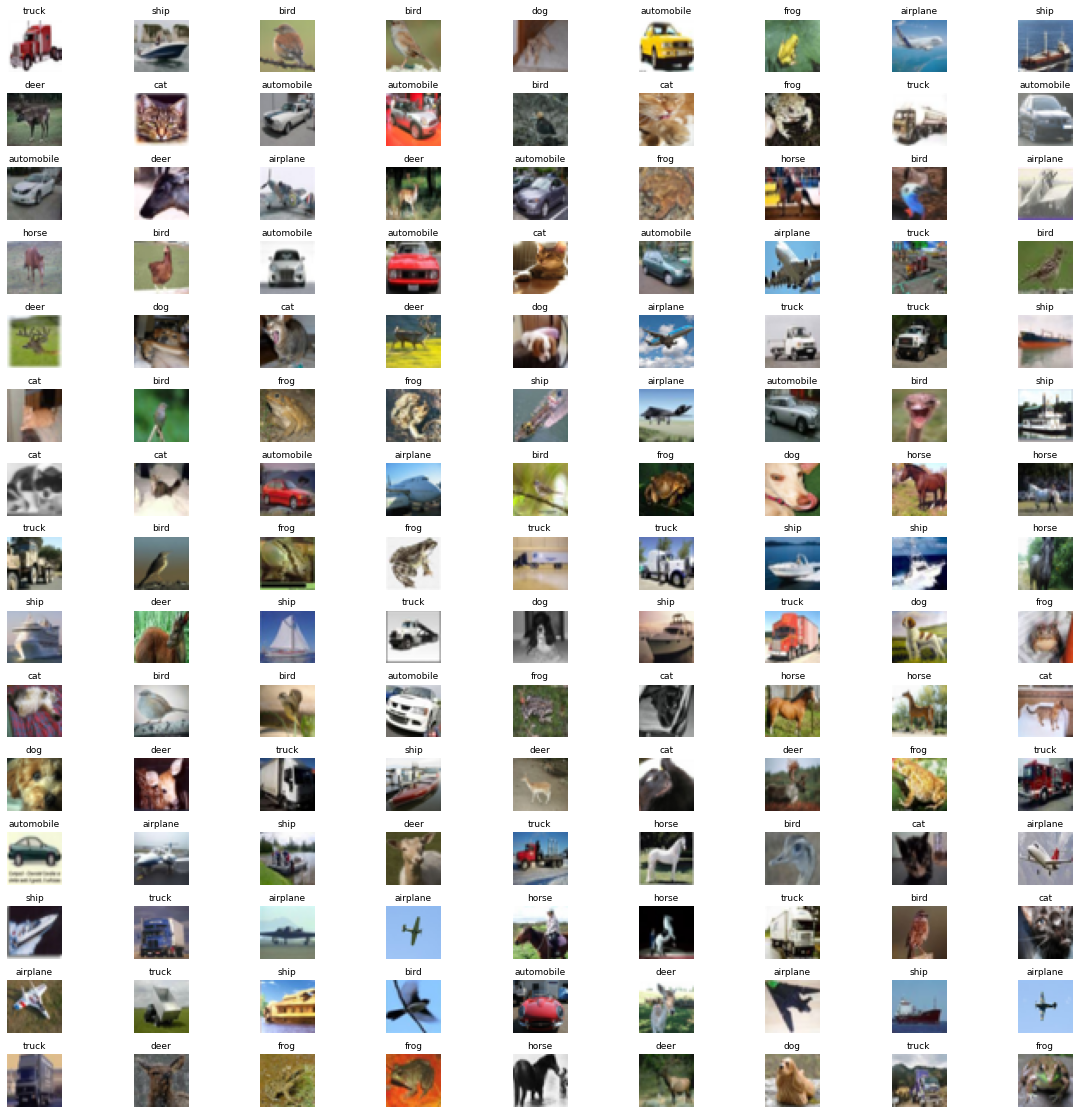

In [10]:
W_grid = 9
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# 

fig, axes = plt.subplots(L_grid, W_grid, figsize = (20,20))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables 

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index    
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(classes[label_index], fontsize = 9)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

Lets convert 2D data into 1D data and then convert the images into numpy array with following codes.




In [11]:
# Reshape converting 2D to 1D
y_test = y_test.reshape(-1,)
y_train = y_train.reshape(-1,)

**Data normalisation:**

It is a crucial step in making sure that each input parameter—in this example, a pixel—has a comparable data distribution. This speeds up convergence while the network is being trained.

In [12]:
# This code normalazation
x_train = x_train / 255.0
x_test = x_test / 255.0

**Imbalanced data:**
Imbalanced data isn't necessarily a negative thing, as there is always some degree of imbalance in actual data sets. However, if the amount of imbalance is minor, your model performance should be unaffected. So we are going to check if we have a banlaced data or imbalanced data! from the following numbers it is clear that we hav a blanced data so we can proceed it for model training.

In [13]:
print(f'Number of samples for {classes[0]} class are : {np.count_nonzero(x_train[0]) + np.count_nonzero(x_test[0])}')
print(f'Number of samples for {classes[1]} class are : {np.count_nonzero(x_train[1]) + np.count_nonzero(x_test[1])}')
print(f'Number of samples for {classes[2]} class are : {np.count_nonzero(x_train[2]) + np.count_nonzero(x_test[2])}')
print(f'Number of samples for {classes[3]} class are : {np.count_nonzero(x_train[3]) + np.count_nonzero(x_test[3])}')
print(f'Number of samples for {classes[4]} class are : {np.count_nonzero(x_train[4]) + np.count_nonzero(x_test[4])}')
print(f'Number of samples for {classes[5]} class are : {np.count_nonzero(x_train[5]) + np.count_nonzero(x_test[5])}')
print(f'Number of samples for {classes[6]} class are : {np.count_nonzero(x_train[6]) + np.count_nonzero(x_test[6])}')
print(f'Number of samples for {classes[7]} class are : {np.count_nonzero(x_train[7]) + np.count_nonzero(x_test[7])}')
print(f'Number of samples for {classes[8]} class are : {np.count_nonzero(x_train[8]) + np.count_nonzero(x_test[8])}')
print(f'Number of samples for {classes[9]} class are : {np.count_nonzero(x_train[9]) + np.count_nonzero(x_test[9])}')

Number of samples for airplane class are : 6137
Number of samples for automobile class are : 6108
Number of samples for bird class are : 6144
Number of samples for cat class are : 6144
Number of samples for deer class are : 6133
Number of samples for dog class are : 6142
Number of samples for frog class are : 6139
Number of samples for horse class are : 6144
Number of samples for ship class are : 6144
Number of samples for truck class are : 6144


In [14]:
print(f'Number of samples in training dataset for {classes[0]} class are : {np.count_nonzero(x_train[0])}')
print(f'Number of samples in training dataset for {classes[1]} class are : {np.count_nonzero(x_train[1])}')
print(f'Number of samples in training dataset for {classes[2]} class are : {np.count_nonzero(x_train[2])}')
print(f'Number of samples in training dataset for {classes[3]} class are : {np.count_nonzero(x_train[3])}')
print(f'Number of samples in training dataset for {classes[4]} class are : {np.count_nonzero(x_train[4])}')
print(f'Number of samples in training dataset for {classes[5]} class are : {np.count_nonzero(x_train[5])}')
print(f'Number of samples in training dataset for {classes[6]} class are : {np.count_nonzero(x_train[6])}')
print(f'Number of samples in training dataset for {classes[7]} class are : {np.count_nonzero(x_train[7])}')
print(f'Number of samples in training dataset for {classes[8]} class are : {np.count_nonzero(x_train[8])}')
print(f'Number of samples in training dataset for {classes[9]} class are : {np.count_nonzero(x_train[9])}')

Number of samples in training dataset for airplane class are : 3065
Number of samples in training dataset for automobile class are : 3072
Number of samples in training dataset for bird class are : 3072
Number of samples in training dataset for cat class are : 3072
Number of samples in training dataset for deer class are : 3061
Number of samples in training dataset for dog class are : 3071
Number of samples in training dataset for frog class are : 3072
Number of samples in training dataset for horse class are : 3072
Number of samples in training dataset for ship class are : 3072
Number of samples in training dataset for truck class are : 3072


# 4. LeNet Model Building and Training
training the LeNet model with all mentioned above parameters.

In [15]:
x_train.shape

(50000, 32, 32, 3)

**LeNet Explaination**


First, I created objects of the tf.keras.Sequential class constructor and assign the variable "lenet" to it. I, then go on to specify the levels of our model within the class constructor. The tf.keras.layers are what we're utilising.

Conv2D class is used to build the network's convolutional layers. A few parameters that we pass are mentioned below. Activation Function: A computational procedure that produces a normalised output from the result or impulses of neurons. An element of a neural network which adds non-linearity into the network is the activation function. The activation function gives the neural network more representational capacity and the ability to handle challenging problems. With a few different values supplied for the parameters, the other convolutional layers use the same layer specification as C1 as their starting point.

Subsampling layers were used in the original work that established the LeNet-5 architecture. The mean of the pixel values that fell inside the 2x2 pooling window was calculated within the subsampling layer, and the value was then multiplied by a coefficient value. All of this is done prior to the data being sent via activation function, and the final result is then added with a bias.

However, we are using the tf.keras.layers in our constructed LeNet neural network. Constructor for AveragePooling2D. The constructor does not receive any arguments since it initialises certain default parameters for the needed parameters when it is called. Keep in mind that the feature maps' purpose in the network ought to be down sampled as they travel through the pooling layer.

The network has two additional kinds of layers: flattening layers and dense layers. The class function Object() { [native code] } tf.keras.layers is used to build the flatten layer. Flatten.

This layer's function is to convert the input into a 1-dimensional array so that it may be fed into the succeeding dense levels.

The output layer contains 10 units, whereas each of the dense layers—F6 has 84—has a certain quantity of units or neurons. The 10 units in the final dense layer represent the quantity of classes in the MNIST data. A soft - max function serves as the output layer's activation function.

In order to determine the distribution o probability of a group of integers included into an input vector, the activation function known as Softmax is used. The result of a softmax activation function is a vector whose collection of values indicates the likelihood that a class or event will occur. The vector's values sum up to one when totaled.

In [16]:
lenet = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='relu', input_shape=(32,32,3), padding='same'), #C1
    keras.layers.AveragePooling2D(), #S1
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='relu', padding='valid'), #C2
    keras.layers.AveragePooling2D(), #S2
    keras.layers.Conv2D(120, kernel_size=5, strides=1, activation='relu', padding='valid'), #C3
    keras.layers.Flatten(), #Flatten    
    keras.layers.Dense(84, activation='relu'), #F1
    keras.layers.Dense(10, activation='softmax') #Output layer
])

In [17]:
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 16)         0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 2, 2, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 480)               0

In [18]:
lenet.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])


**Training LeNET model**

In [19]:
hist = lenet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 15s 8ms/step - loss: 1.6145 - accuracy: 0.4126 - val_loss: 1.3876 - val_accuracy: 0.5085
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3009 - accuracy: 0.5349 - val_loss: 1.2903 - val_accuracy: 0.5416
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1640 - accuracy: 0.5858 - val_loss: 1.1739 - val_accuracy: 0.5819
Epoch 4/100
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0732 - accuracy: 0.6196 - val_loss: 1.0703 - val_accuracy: 0.6242
Epoch 5/100
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0093 - accuracy: 0.6421 - val_loss: 1.0476 - val_accuracy: 0.6302
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9567 - accuracy: 0.6620 - val_loss: 1.1141 - val_accuracy: 0.6130
Epoch 7/100
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9054 - accuracy: 0.6792 - val_loss: 1.0034 - val

**Results by LeNET**

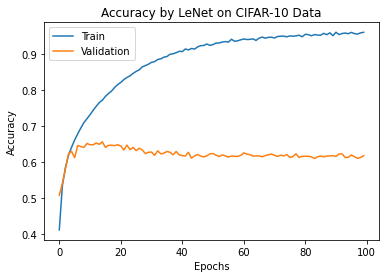

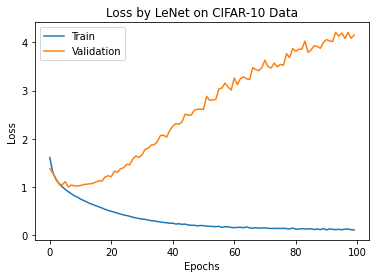

In [20]:
# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Accuracy by LeNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss by LeNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()


**Confusion Matrix** 

In [21]:

y_predictions= lenet.predict(x_test)
y_predictions.reshape(-1,)
y_predictions= np.argmax(y_predictions, axis=1)

confusion_matrix(y_test, y_predictions)

313/313 [==============================] - 1s 2ms/step


array([[661,  36,  70,  26,  29,  11,  14,  12,  95,  46],
       [ 23, 771,  17,  16,   3,   8,  12,   4,  35, 111],
       [ 84,  10, 498,  95,  97,  71,  64,  51,  16,  14],
       [ 38,  14,  74, 448,  75, 184,  79,  43,  18,  27],
       [ 34,  10,  94,  89, 514,  74,  73,  87,  11,  14],
       [ 15,   6,  69, 223,  62, 471,  56,  71,   7,  20],
       [  6,  12,  45,  95,  47,  48, 707,  24,   6,  10],
       [ 19,  10,  36,  68,  75,  82,  15, 658,   4,  33],
       [100,  40,  15,  35,   6,  12,  10,   8, 733,  41],
       [ 43, 104,  15,  34,  11,  13,  13,  19,  27, 721]])

**Confusion Matrix Plot**

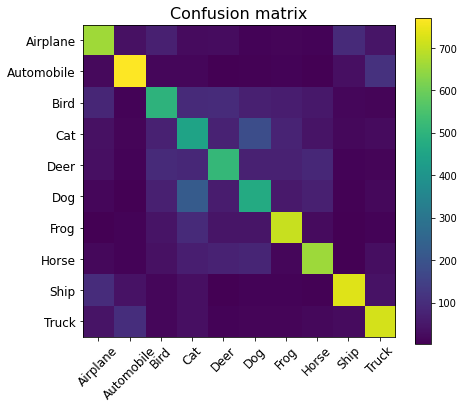

In [22]:
# confusion matrix and accuracy
classes_name = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()

**Accuracy score on Test Data set**


In [23]:
print("Test accuracy:", accuracy_score(y_test, y_predictions))

Test accuracy: 0.6182


**Performance Visualization**

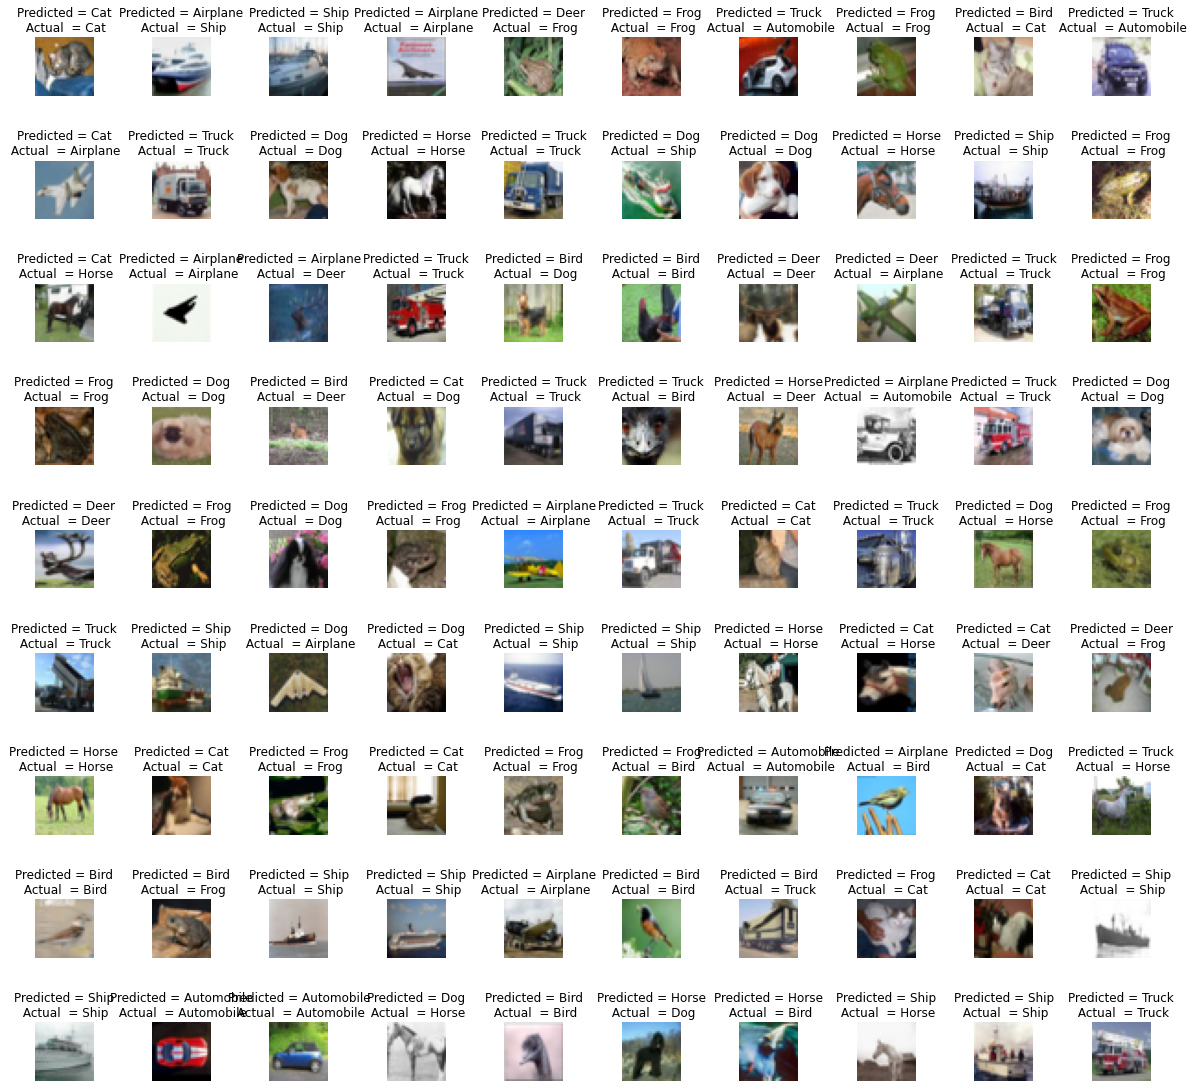

In [24]:
L = 9
W = 10
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes_name[y_predictions[i]], classes_name[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

**Results from LeNet**

61% efficiency has been achieved from LeNET
**Confusion Matrix:**
A matrix that describe a classification model's performance.All diagonal values are denoting true classes and others are wrong predicted classes. So, from the above confusion matrix we can understand that dog and cats classes are misclasified,Deer and Birds classes are misclassified with each other similarlay automobile and trucks are misclassified with each othe mostly. We have a visualization of confusion matrix as well both are describing the model's performance.

**Test accuracy:**
We are comaring the distance between test data and predicted data to calculate accuracy score for model ondataset

**Actual and prediced classes visualization:**
At last we showed some random actuall and predicted classes sample. Where we can see that results are matched with confusion matrix as well.

#5. AlexNET Model Building and Training

**AlexNet.**
AlexNet model is known for its parameters that are written below one by one . This model is trained with 8 layers in total in which 5 are convolutional and 3 are fully connected layers

**ReLU Nonlinearity.**
Instead of tanh , there is Relu function used to produced non-linearties.this is 6 time more fast than tanh function.in terms of error reach on CIFAR-10.

**Multiple GPUs.**
Another feature that make AlexNet special than other CNN networks is multile gpus ,it allows multiple GPUs to for training.In this way we distribute the computitions and save time as well.

**Overlapping Pooling.**
In this model Author used poolimh layers as well that reduced the error and improve the accuracy.

**Illustration of AlexNet’s architecture.**
AlexNet has overfitting problem due to its large number of parameters. To reduce this author took following steps.

**Data Augmentation.**
To increase the variety of their data, the authors utilised label-preserving manipulation. They specifically created picture translations and horizontal reflections, which boosted the training set by a factor of 2048. They also used Principle Component Analysis (PCA) to adjust the intensities of the RGB channels, which lowered the top-1 mistake rate by more than 1%.

**Dropout.**
This technique involves "turning off" neurons with a specified frequency (e.g. 50 percent ). Because each cycle employs a random technique of the model's parameters, each neuron is forced to get more durable characteristics that can be applied to random neurons. Dropout, though, lengthens the amount of time required for training until the model converges.

**Model Building**

In [25]:
#Define Alexnet Model
AlexNet = Sequential()
AlexNet.add(Conv2D(filters=16,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(5,5),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Conv2D(60,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(30,(3,3),padding='same',activation='relu'))
AlexNet.add(Conv2D(20,(3,3),padding='same',activation='relu'))
AlexNet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
AlexNet.add(Flatten())
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(200, activation='relu'))
AlexNet.add(Dropout(0.1))
AlexNet.add(Dense(10,activation='softmax'))

AlexNet.compile(optimizer='SGD', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
AlexNet.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 8, 8, 16)          448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 4, 4, 16)         0         
 )                                                               
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 60)          24060     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 60)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 2, 2, 60)          32460     
                                                                 
 conv2d_6 (Conv2D)           (None, 2, 2, 30)         

**Explaination Of AlexNet**

**First input Layer:**
A 3232 RGB picture serves as the input for AlexNet. This indicates that all of the training set's and test set's photos are 3232 pixels in size. If the input picture is not 3232, it is rescaled so that the shorter size is 32 and the middle 3232 patch is cropped out of the final image. With the raw RGB pixel intensity, the picture is trained. As a result, a grayscale input picture is transformed to an RGB picture. Through random cropping, pictures of size 3333 were created from photos of size 3232, and these were fed into AlexNet's first layer.

**Convolutional Layers:**
A convoloutional layer covolves the image and creates an activation map for next layer. we can calculate the output of convoloutional layer with following formula:

output= ((Input-filter size)/ stride)+1
There are five convoloutional layers in AlexNet model. For each layer same padding and Rectified linear unit(ReLu) is used to produce non-linearties in it. while the kernal size and stride is different for each which depends on image size. 1st,2nd and 3rd convolutional layers are followed by Maxpooling layers while other are directely connected with each other.

**Max Pooling Layers:**
A pooling procedure known as maximum pooling, sometimes known as max pooling, determines the maximum or greatest values for each region of each feature map. In AlexNe there are 3 Max Pooling layers that are connected with Convoloutional layers.As mentioned above.

**Flatten Layer:**
A flatten layer is used to reduce each layer of a multi-layered picture to a single plane. after convolutional and mapooling layers flatten layer is used to reduce dimensions of images in single tensor.

**Dense Layers:**
The dense layer is the typical layer of a neural network with many connections. It is the most typical and often utilized layer. Dense layer generates an output below on the input and then returns the result.

output = activation(dot(input, kernel) + bias)
**Dropout Layers:**
In order to avoid overfitting, the Dropout layer randomised sets of input units to 0 with a frequency of rate at each step during training. The sum of all inputs is maintained by scaling up non-zero inputs by 1/(1 - rate). The learnig rate is set as 0.1.

In last dense layer softmax activation function is used when there are more than two classes to predict as in our data set we have 10 classes.

**Training AlexNet model**

In [26]:
history1 = AlexNet.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 9s 5ms/step - loss: 2.2992 - accuracy: 0.1278 - val_loss: 2.2914 - val_accuracy: 0.1528
Epoch 2/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.2123 - accuracy: 0.1735 - val_loss: 2.0651 - val_accuracy: 0.2039
Epoch 3/100
1563/1563 [==============================] - 8s 5ms/step - loss: 2.0482 - accuracy: 0.2129 - val_loss: 1.9609 - val_accuracy: 0.2503
Epoch 4/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.9437 - accuracy: 0.2589 - val_loss: 1.8925 - val_accuracy: 0.2838
Epoch 5/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.8343 - accuracy: 0.2959 - val_loss: 1.8017 - val_accuracy: 0.3155
Epoch 6/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.7424 - accuracy: 0.3340 - val_loss: 1.7113 - val_accuracy: 0.3492
Epoch 7/100
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6683 - accuracy: 0.3676 - val_loss: 1.6096 - val_ac

**Results by AlexNet**



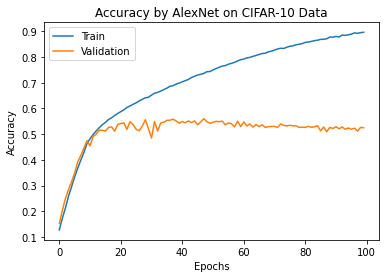

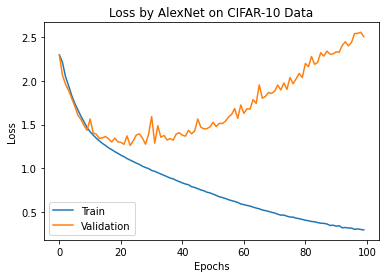

In [27]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title("Accuracy by AlexNet on CIFAR-10 Data")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Loss by AlexNet on CIFAR-10 Data')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

**Confusion Matrix**

In [28]:
y_predictions1 = AlexNet.predict(x_test)
y_predictions1.reshape(-1,)
y_predictions1= np.argmax(y_predictions1, axis=1)

confusion_matrix(y_test, y_predictions1)

313/313 [==============================] - 1s 2ms/step


array([[669,  39,  58,  21,  24,   9,  16,  28,  87,  49],
       [ 70, 621,   6,  12,   5,   4,  17,  22,  56, 187],
       [ 93,  16, 404,  70, 124,  82,  92,  73,  24,  22],
       [ 44,  32, 102, 284,  79, 214, 117,  74,  18,  36],
       [ 46,   9, 127,  41, 460,  49, 112, 134,  12,  10],
       [ 27,  16,  82, 184,  84, 405,  65,  99,  13,  25],
       [  9,  26,  62,  72, 112,  36, 623,  23,  10,  27],
       [ 53,  25,  50,  55,  86,  74,  21, 585,   9,  42],
       [152,  57,  27,  21,  29,  14,  10,  13, 606,  71],
       [101, 140,  12,  18,  10,  14,  12,  48,  53, 592]])

**Confusion Matrix Plot**


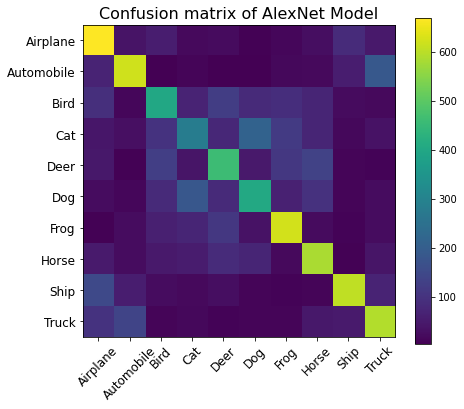

In [29]:
# confusion matrix and accuracy
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix of AlexNet Model', fontsize=16)
plt.imshow(confusion_matrix(y_test, y_predictions1))
plt.xticks(np.arange(10), classes_name, rotation=45, fontsize=12)
plt.yticks(np.arange(10), classes_name, fontsize=12)
plt.colorbar()
plt.show()

**Accuracy score on Test Data set**


In [30]:
print("Test accuracy by AlexNet:", accuracy_score(y_test, y_predictions))

Test accuracy by AlexNet: 0.6182


**Performance Visualization**

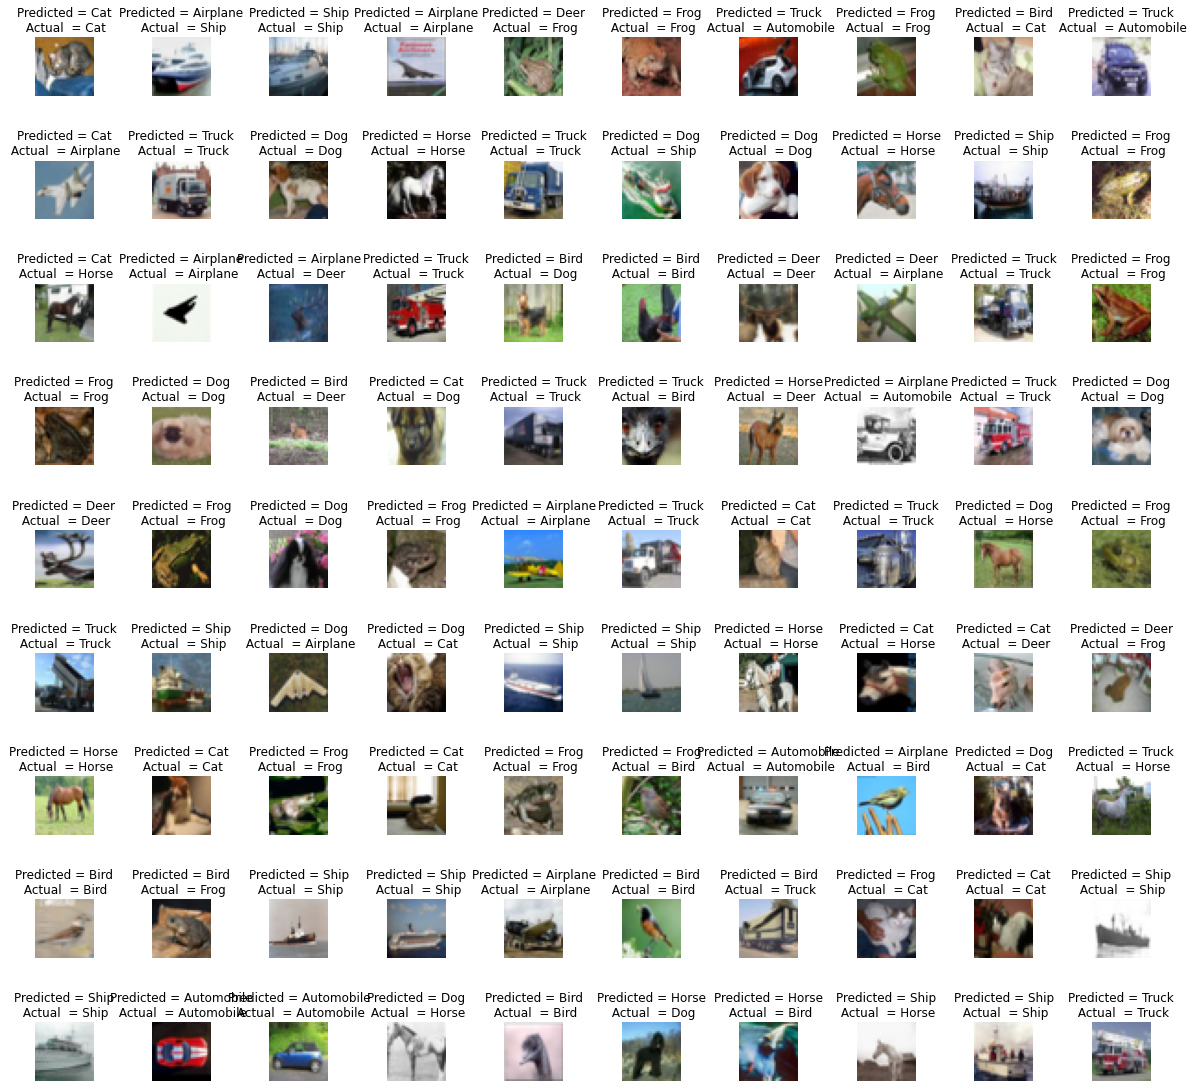

In [31]:
L = 9
W = 10
fig, axes = plt.subplots(L, W, figsize = (20,20))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(x_test[i])
    axes[i].set_title("Predicted = {}\n Actual  = {}".format(classes_name[y_predictions[i]], classes_name[y_test[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

# Conclusion

In this notebook I performed comparision of two famous CNN algorithims LeNet and AlexNet on CIFAR_10 Dataset. Both models are trained on cifar10 dataset.In cifar10 there are 10 classes and I performed a classification with the mentioned above models. LeNet has very less number of paramerters and layers as compared to AlexNet model.However AlexNet is much deeper network than LeNet. But on CIFAR-10 data as we can see in results section AlexNet is not performed out the box in comparision of LeNet.If we look at the Accuracy score of LeNet on test data that is 59% while with ALexNet we got same accuracy with AlexNet.But we can improve it using different parameters. However it is noted that AlexNet was trained and developed for a very large dataset like ImageNet dataset, and cifar10 is smaller data that is why AlexNet is facing overfitting similary LeNet is also facing overfitting.

# References

1. Overview of LeNET: https://www.analyticsvidhya.com/blog/2021/03/the-architecture-of-lenet-5/
2. Overview of AlexNET: https://www.analyticsvidhya.com/blog/2021/03/introduction-to-the-architecture-of-alexnet/
3. CIFAR 10: https://www.kaggle.com/c/cifar-10
4. MNIST Overview:http://yann.lecun.com/exdb/mnist/
5. Fashion-MNIST Overview: https://www.kaggle.com/datasets/zalando-research/fashionmnist
6. LeNET with Keras: https://www.kaggle.com/code/curiousprogrammer/lenet-5-cnn-with-keras-99-48
7. AlexNET with Keras: https://github.com/pravinkr/alexnet-cifar10-using-keras/blob/master/cifar_10_with_Alexnet.ipynb
8. Confusion Matrix and Its Plot: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html